# Pymaceuticals Inc.
---

### Analysis

- Drug- Capomulin has been used for highest number of mice which is 230.
- With help of piechart, it shows that male mice is higher in number (958) which is about 51% whereas female mice number is 922 which acounts for around 49%.
- Around timepoint (days) of 20, there is maximum increase in tumor volume.
- With scatter plot, after timepoint of 20 there is more increase in tumor volume.
- The correlation between Weight and Average Tumor Volume is 0.84 which is a strongly correlated (positive) and tumor volume increases with weight.
- Regression tells how much Tumor volume changes with the weight change of mice. The r-squared value is 0.7088568047708723 which is around 70% which shows it is a good model fit for the data and variance is around the mean value.

 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, how="right" ,   on=["Mouse ID","Mouse ID"])

# Display the data table for preview
                        
data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [5]:
# Checking the number of mice.

total_mice_id= len(data_complete["Mouse ID"].value_counts())
total_mice_id

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mouse_ID_duplicate = data_complete.loc[data_complete.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
Mouse_ID_duplicate 

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate= data_complete.loc[data_complete["Mouse ID"]=="g989"]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df= data_complete[data_complete["Mouse ID"].isin(Mouse_ID_duplicate)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_clean_total= len(clean_df["Mouse ID"].unique())
mice_clean_total

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median_tumor = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance_tumor = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std_tumor = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem_tumor = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

summary_tumor_drug= pd.DataFrame({"Mean Tumor Volume": mean_tumor,"Median Tumor Volume": median_tumor,
                                  "Tumor Volume Variance": variance_tumor, "Tumor Volume Std. Dev.":std_tumor,
                                  "Tumor Volume Std. Err.": sem_tumor
                                  })


summary_tumor_drug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean_tumor = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median_tumor = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance_tumor = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std_tumor = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem_tumor = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

# Using the aggregation method, produce the same summary statistics in a single line.
aggregation_summary= clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median", "var","std","sem"])
aggregation_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

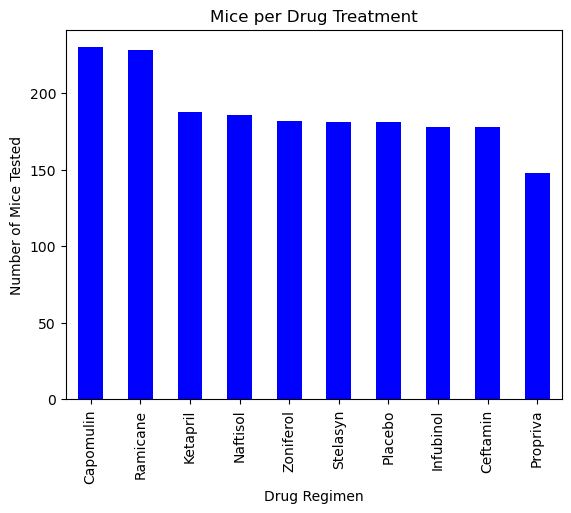

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Mice per Drug Treatment")

pandas_plot = clean_df["Drug Regimen"].value_counts().plot.bar(color="blue")



In [13]:
mice_number = clean_df["Drug Regimen"].value_counts()
mice_number

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [14]:
y = mice_number.values

In [15]:
x= mice_number.index.values

(0.0, 230.0)

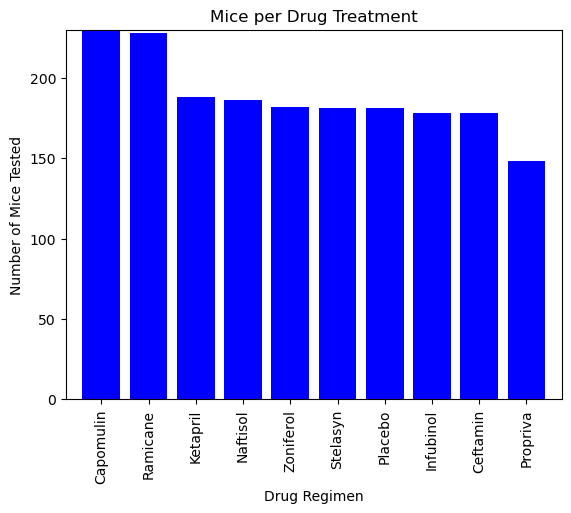

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x= mice_number.index.values
x_axis = x
y = mice_number.values
y_axis = y

plt.bar(x_axis,y_axis, color="blue", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Mice per Drug Treatment")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation="vertical")

# Set the limits of the y axis
plt.xlim(-0.75, len(x_axis)-0.25)
# Set the limits of the y axis
plt.ylim(0, max(y_axis))

In [17]:
gender= clean_df["Sex"].value_counts()
gender

Male      958
Female    922
Name: Sex, dtype: int64

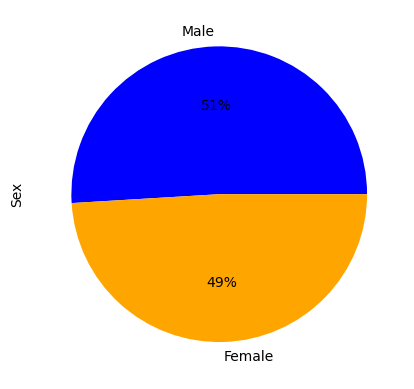

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender= clean_df["Sex"].value_counts()
colors=["Blue", "Orange"]
gender.plot.pie(autopct='%1.0f%%',colors=colors)
plt.ylabel("Sex")
plt.show()

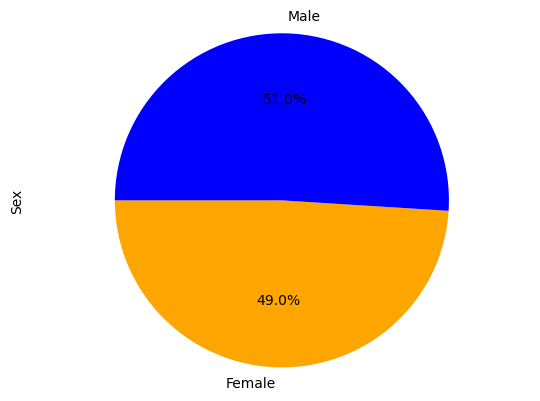

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels= ["Female","Male"]
sizes= [49.0, 51.0]
colors = ["orange", "blue"]
plt.pie(sizes,  labels=labels, colors=colors,
        autopct="%1.1f%%" ,startangle=180)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
tumor_volume_mice = clean_df.groupby("Mouse ID")["Timepoint"].max()
tumor_volume_mice = tumor_volume_mice.reset_index() 
tumor_volume_mice

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [21]:
merge_data_new = tumor_volume_mice.merge(clean_df,on=["Mouse ID","Timepoint"],how="left")
merge_data_new

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [22]:
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
volume_list =[]
for drug in drug_list:
    final_tumor_volume = merge_data_new.loc[merge_data_new["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    volume_list.append(final_tumor_volume)
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # print(f"The lower quartile of temperatures is: {lowerq}")
    # print(f"The upper quartile of temperatures is: {upperq}")
    # print(f"The interquartile range of temperatures is: {iqr}")
    # print(f"The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = final_tumor_volume.loc[(final_tumor_volume < lower_bound)|(final_tumor_volume > upper_bound)]
    print(f"{drug} {outlier}")
    # print(f"Values above {upper_bound} could be outliers.")

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


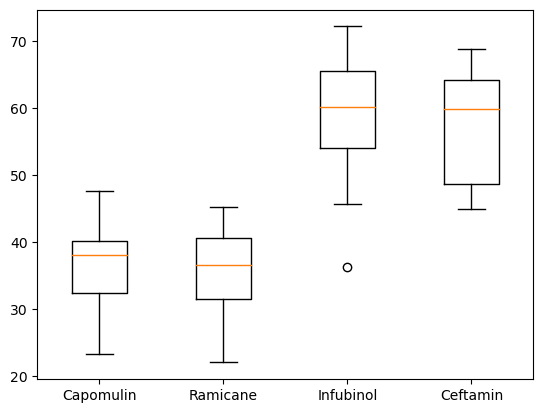

In [31]:
plt.boxplot(volume_list,labels = drug_list)
plt.show()

In [24]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

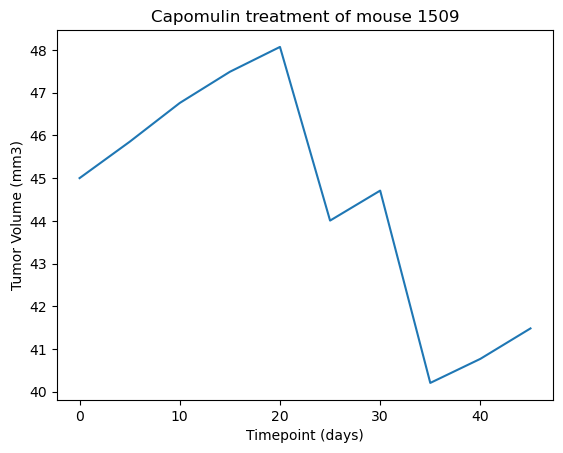

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_tumor_volume = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
line_df = Capomulin_tumor_volume.loc[Capomulin_tumor_volume['Mouse ID']== 'l509']

plt.plot(line_df["Timepoint"],line_df["Tumor Volume (mm3)"])

plt.title("Capomulin treatment of mouse 1509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()



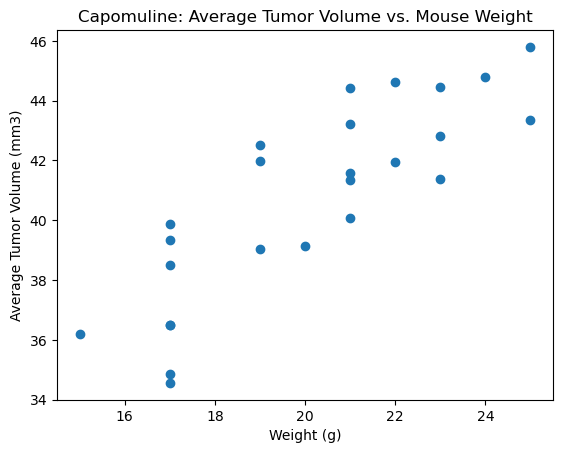

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_tumor_volume= clean_df.loc[(clean_df["Drug Regimen"]== "Capomulin")]
capomulin_av_scatter= Capomulin_tumor_volume.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_av_scatter["Weight (g)"], capomulin_av_scatter["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomuline: Average Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

In [28]:

Capomulin_tumor_volume= clean_df.loc[(clean_df["Drug Regimen"]== "Capomulin")]
capomulin_av_scatter= Capomulin_tumor_volume.groupby(["Mouse ID"]).mean()
capomulin_av_scatter.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


The correlation between both factors is 0.84


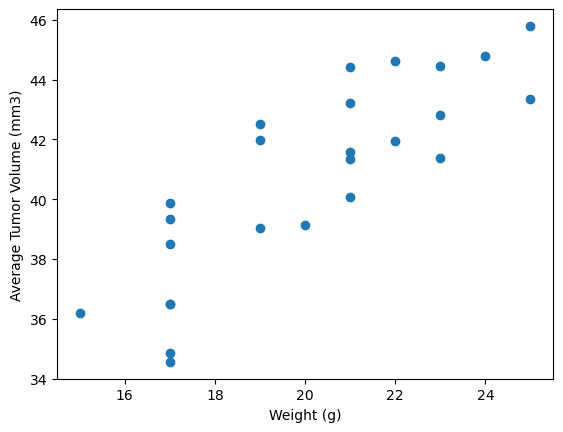

In [29]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
Weight = capomulin_av_scatter.iloc[:,1]
Average = capomulin_av_scatter.iloc[:,3]
correlation = st.pearsonr(Weight,Average)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.scatter(Weight,Average)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
# print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.7088568047708723


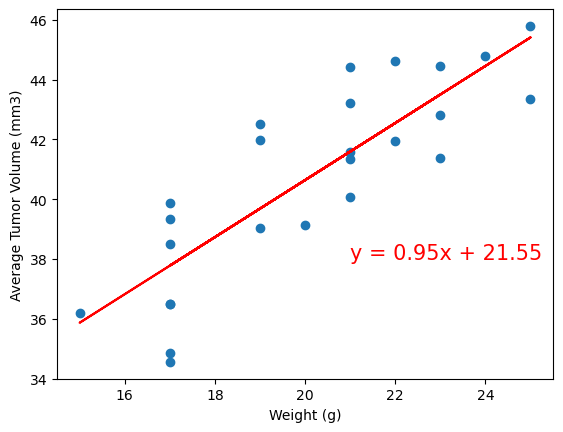

In [30]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
Capomulin_tumor_volume= clean_df.loc[(clean_df["Drug Regimen"]== "Capomulin")]
capomulin_av_scatter= Capomulin_tumor_volume.groupby(["Mouse ID"]).mean()
x_values = capomulin_av_scatter["Weight (g)"]
y_values = capomulin_av_scatter["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,38),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()